#  Veri Yükleme

In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/Havva Nur Ezginci/Desktop/BitirmeProjesi/Dataset/Diyabet/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [216]:
print(df.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


C:\Kisisel_Dosyalarim\anaconda3\envs\tf-gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

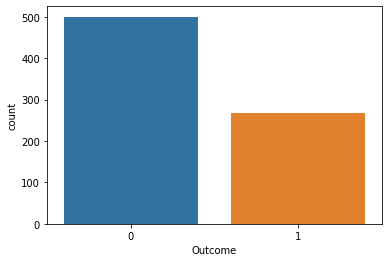

In [217]:
import seaborn as sns
sns.countplot(df['Outcome'],label="Count")

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [219]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [220]:
df.eq(0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [221]:
df.shape

(768, 9)

#  Eksik değerlerin doldurulması
ortalama alıp eksik sayısal değerleri tamamlama

In [222]:
# 0 olan değereler Nan atadık
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']].replace(0,np.NaN)

In [223]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values = np.nan, strategy="mean")

eksik_veriler = df.iloc[:,1:7].values
imputer = imputer.fit(eksik_veriler[:]) # fit eğitim için sayısal kolonlar üzerinde öğrenme yapıcak
# simple imputer daki stratejimiz ortalama değerdir  öğrenilen değerlerin dönüştürülmesi için transform fonksiyonunu kullanıcaz

eksik_veriler[:] = imputer.transform(eksik_veriler[:]) #nan değerler değişicek
sonuc2= pd.DataFrame(data=eksik_veriler,index=range(768),columns=['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction'])

df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']] = sonuc2
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


In [224]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [225]:
df.eq(0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [226]:
X = df.iloc[:,0:8]
Y = df.iloc[:,8:]
X.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,155.548223,33.6,0.627,50
1,1,85.0,66.0,29.0,155.548223,26.6,0.351,31


In [227]:
Y.Outcome.unique()

array([1, 0], dtype=int64)

In [228]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
# uzak aralıkta olan değerler birbirlerine gore olcekledik yakın hale gelmiş oldu
X = scaler.transform(X)
X

array([[ 0.63994726,  0.86510807, -0.03351824, ...,  0.16629174,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20616153, -0.52985903, ..., -0.85253118,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.0158134 , -0.69530596, ..., -1.33283341,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.0225789 , -0.03351824, ..., -0.91074963,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14180757, -1.02619983, ..., -0.34311972,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94314317, -0.19896517, ..., -0.29945588,
        -0.47378505, -0.87137393]])

# Model Oluşturma

In [229]:
from sklearn.linear_model import Perceptron,LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [241]:
def get_models():
    models = list()
    models.append(LogisticRegression(random_state=5))
    models.append(Perceptron(max_iter=60,eta0=0.1,random_state=42))
    models.append(MLPClassifier(hidden_layer_sizes=(6,6,6,6), max_iter=10000))
    models.append(DecisionTreeClassifier(max_depth=6,random_state=1))
    models.append(KNeighborsClassifier(n_neighbors=8,metric='minkowski'))# default ; n_neighbors= 5,metric = mesafe(minkowski) kullanır.
    models.append(SVC(kernel='linear')) # kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
    models.append(GaussianNB())
    models.append(RandomForestClassifier(n_estimators = 12,random_state=0))
    return models

# Tahmin Etme ve Değerlendirme

In [242]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from numpy import mean

def degerlendirme(model,X,y):
    predict = model.predict(X)
    print(confusion_matrix(y,predict))
    print(classification_report(y,predict))
    

def evaluate_model(cv,model): # k fold validation 
    scores = cross_val_score(model, X,Y, scoring='accuracy', cv=cv, n_jobs=-1)
    return mean(scores), scores.min(), scores.max()

# Eğitim ve Test Veri Kümelerinin Oluşturulması ve Modellerin Eğitilmesi¶

In [243]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

In [244]:
def bol(testSize=0.20):
    X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=testSize,random_state=0)
    print("X Training Data :",X_train.shape)
    print("X Testing Data :",X_test.shape)
    print("Y Training Data :",y_train.shape)
    print("Y Testing Data :",y_test.shape)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test= bol()

X Training Data : (614, 8)
X Testing Data : (154, 8)
Y Training Data : (614, 1)
Y Testing Data : (154, 1)


In [246]:
# Verilerin belirli bir oranda test ve train olarak bolunmesi ile model eğitimi (default : %80-%20 kullandım)
models = get_models()
best_model_score = -1
trained_modelers = []
for model in models:
    model.fit(X_train,np.ravel(y_train))
    trained_modelers.append(model)
    print(">%s skor:"%(type(model).__name__))
    
    predictions_train = model.predict(X_train)
    print("        eğitim:",round(accuracy_score(predictions_train, np.ravel(y_train)),3))
    
    y_pred = model.predict(X_test)
    acc_score = accuracy_score(y_pred, np.ravel(y_test))
    print("        test:",round(acc_score,3))
    
    if(acc_score > best_model_score):
        best_model_score = acc_score
        best_model = model  
        
print("\nEn iyi skora sahip modelin (%s) konfüzyon matrisi: "%(type(best_model).__name__))
print("\nTest verileri:\n")
degerlendirme(best_model,X_test,y_test)
print("\nEğitim verileri:\n")
degerlendirme(best_model,X_train,y_train)

>LogisticRegression skor:
        eğitim: 0.767
        test: 0.812
>Perceptron skor:
        eğitim: 0.721
        test: 0.799
>MLPClassifier skor:
        eğitim: 0.824
        test: 0.779
>DecisionTreeClassifier skor:
        eğitim: 0.855
        test: 0.786
>KNeighborsClassifier skor:
        eğitim: 0.785
        test: 0.805
>SVC skor:
        eğitim: 0.762
        test: 0.799
>GaussianNB skor:
        eğitim: 0.749
        test: 0.786
>RandomForestClassifier skor:
        eğitim: 0.989
        test: 0.792

En iyi skora sahip modelin (LogisticRegression) konfüzyon matrisi: 

Test verileri:

[[97 10]
 [19 28]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       107
           1       0.74      0.60      0.66        47

    accuracy                           0.81       154
   macro avg       0.79      0.75      0.76       154
weighted avg       0.81      0.81      0.81       154


Eğitim verileri:

[[345  48]
 [ 95 126]]
        

In [247]:
print("Karar ağacı özelliklerin önem yüzdelikleri:\n{}".format(trained_modelers[3].feature_importances_))

Karar ağacı özelliklerin önem yüzdelikleri:
[0.01147274 0.37701637 0.07524925 0.06196233 0.06910943 0.19682277
 0.05909082 0.1492763 ]


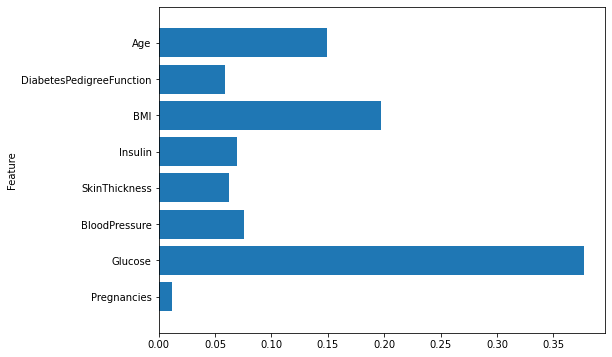

In [248]:
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features),[x for i, x in enumerate(df.columns) if i!=8])
    plt.xlabel("")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_diabetes(trained_modelers[3])
plt.savefig('feature_importance')

#  K FOLD CROSS VALİDATİON 

In [249]:
folds = range(5,31,5)
models = get_models()

for k in folds:
    cv = KFold(n_splits=k,random_state = 0, shuffle=True)
    print(">>>>>>>>> %d fold cross validation:"%(k))
    print()
    for model in models:
        k_mean, k_min, k_max = evaluate_model(cv,model)
        # report performance
        print('>%s: accuracy=%.3f (%.3f,%.3f)' % (type(model).__name__, k_mean, k_min, k_max))
    print("\n")
    

>>>>>>>>> 5 fold cross validation:

>LogisticRegression: accuracy=0.771 (0.752,0.812)
>Perceptron: accuracy=0.672 (0.623,0.706)
>MLPClassifier: accuracy=0.756 (0.712,0.784)
>DecisionTreeClassifier: accuracy=0.725 (0.699,0.786)
>KNeighborsClassifier: accuracy=0.753 (0.708,0.805)
>SVC: accuracy=0.762 (0.739,0.799)
>GaussianNB: accuracy=0.747 (0.708,0.786)
>RandomForestClassifier: accuracy=0.750 (0.712,0.779)


>>>>>>>>> 10 fold cross validation:

>LogisticRegression: accuracy=0.771 (0.701,0.857)
>Perceptron: accuracy=0.686 (0.584,0.816)
>MLPClassifier: accuracy=0.751 (0.675,0.818)
>DecisionTreeClassifier: accuracy=0.747 (0.675,0.818)
>KNeighborsClassifier: accuracy=0.747 (0.675,0.831)
>SVC: accuracy=0.763 (0.688,0.857)
>GaussianNB: accuracy=0.743 (0.658,0.831)
>RandomForestClassifier: accuracy=0.750 (0.649,0.844)


>>>>>>>>> 15 fold cross validation:

>LogisticRegression: accuracy=0.769 (0.686,0.885)
>Perceptron: accuracy=0.674 (0.510,0.765)
>MLPClassifier: accuracy=0.730 (0.549,0.827)
>